# General NLP Categoriser of Rumours

In [1]:
import pandas as pd
import numpy as np
np.random.seed(1234)
df = pd.read_csv('RumourDatabase.csv', encoding='utf-8')
df

,Unnamed: 0,Duplicate indexes (add the index of the first entry),Category,Claim,Debunk_Date,Idx,Label,Source,Unnamed: 8,Topics
0,0.0,NaN,Virus origin and properties,"Covid originated from Wuhan, China",23/11/2020,0.0,True,WHO,NaN,"Public authority actions, policy, and communic..."
1,1.0,NaN,Virus origin and properties,Covid was reported on 31.12.2019,23/11/2020,1.0,True,WHO,NaN,Community spread and impact
2,2.0,NaN,Virus origin and properties,Symptom of Covid is fever,23/11/2020,2.0,True,WHO,NaN,Medical advice and self-treatments
3,3.0,NaN,Virus origin and properties,Symptom of Covid is a dry cough,23/11/2020,3.0,True,WHO,NaN,Claims about prominent actors
4,4.0,NaN,Virus origin and properties,Symptom of Covid is fatigue,23/11/2020,4.0,True,WHO,NaN,Conspiracy theories
5,5.0,NaN,Virus origin and properties,Less common symptom of Covid is loss of taste,23/11/2020,5.0,True,WHO,NaN,Virus transmission
6,6.0,NaN,Virus origin and properties,Less common symptom of Covid is loss of smell,23/11/2020,6.0,True,WHO,NaN,Virus origin and properties
7,7.0,NaN,Virus origin and properties,Less common symptom of Covid is nasal congestion,23/11/2020,7.0,True,WHO,NaN,"Public preparedness, protests, and civil disob..."
8,8.0,NaN,Virus origin and properties,Less common symptom of Covid is conjunctivitis...,23/11/2020,8.0,True,WHO,NaN,"Vaccines, medical treatments, and tests"
9,9.0,NaN,Virus origin and properties,Less common symptom of Covid is sore throat,23/11/2020,9.0,True,WHO,NaN,Other


In [2]:
df.drop(['Unnamed: 0', 'Duplicate indexes (add the index of the first entry)', 'Idx', 'Unnamed: 8', 'Topics'], axis=1, inplace=True)

In [3]:
df_new = df.copy()
df_new.drop_duplicates(subset="Claim", keep=False, inplace=True)
df_new['Claim'] = df_new['Claim'].str.replace(r'[_\W\d]',' ')
df_new['Claim'] = df_new['Claim'].str.lower()
df_new['Category'] = df_new['Category'].fillna('Other')
df_new.reset_index(drop=True, inplace=True)
df_new.head()

,Category,Claim,Debunk_Date,Label,Source
0,Virus origin and properties,covid originated from wuhan china,23/11/2020,True,WHO
1,Virus origin and properties,covid was reported on,23/11/2020,True,WHO
2,Virus origin and properties,symptom of covid is fever,23/11/2020,True,WHO
3,Virus origin and properties,symptom of covid is a dry cough,23/11/2020,True,WHO
4,Virus origin and properties,symptom of covid is fatigue,23/11/2020,True,WHO


In [47]:
db_stopwords = [
    'iphoto',
    'photo',
    'photograph',
    'foto',
    'screenshot',
    'ss',
    'video',
    'film',
    'facebook',
    'fb',
    'twitter',
    'instagram',
    'insta',
    'whatsapp',
    'graphic',
    'post',
    'audio',
    'clip',
    'show',
    'shown',
]

In [48]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
import string
import gensim
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(content_collection, threshold=4, porter_stem=False, lan_stem=False):
    wordnet_lemmatizer = WordNetLemmatizer()
    porter = PorterStemmer()
    lan_porter = LancasterStemmer()
    stop_words = set(stopwords.words('english') + db_stopwords)
    clean_content=[]
    for content in content_collection:
        #turn string into tokens
        word_tokens = word_tokenize(content)
        words = [wordnet_lemmatizer.lemmatize(w) for w in word_tokens if w not in stop_words] #remove stop words
        if porter_stem:
            words = [porter.stem(w) for w in words]
            words = [word for word in words if word not in stop_words]
        if lan_stem:
            words = [lan_porter.stem(w) for w in words]
            words = [word for word in words if word not in stop_words]
        #lowercase, remove stop words and punctuation/numbers
        clean_content.append( [w for w in words if len(w) > threshold] ) 
    return clean_content
clean_content = clean_text(df_new['Claim'], lan_stem=True)
clean_content

[['covid', 'origin'],
 ['covid', 'report'],
 ['symptom', 'covid'],
 ['symptom', 'covid', 'cough'],
 ['symptom', 'covid', 'fatigu'],
 ['common', 'symptom', 'covid'],
 ['common', 'symptom', 'covid'],
 ['common', 'symptom', 'covid', 'congest'],
 ['common', 'symptom', 'covid', 'conjunctivit'],
 ['common', 'symptom', 'covid', 'throat'],
 ['common', 'symptom', 'covid', 'headach'],
 ['common', 'symptom', 'covid', 'joint'],
 ['common', 'symptom', 'covid'],
 ['common', 'symptom', 'covid', 'nause', 'vomit'],
 ['common', 'symptom', 'covid', 'diarrhe'],
 ['common', 'symptom', 'covid', 'dizzy'],
 ['covid', 'symptom', 'short'],
 ['covid', 'symptom', 'appetit'],
 ['covid', 'symptom', 'confus'],
 ['covid', 'symptom', 'persist', 'press', 'chest'],
 ['covid', 'symptom'],
 ['peopl', 'diagnos', 'covid', 'recov'],
 ['child', 'develop', 'inflam', 'syndrom', 'covid', 'infect'],
 ['comply', 'covid', 'respir'],
 ['comply', 'covid', 'respir', 'distress', 'syndrom'],
 ['comply', 'covid', 'shock'],
 ['comply', 'c

In [49]:
df_new['Keywords'] = clean_content

In [35]:
final = pd.DataFrame({'Claim': df_new['Claim'],'Keywords': clean_content})
#final.to_csv('Claim2Keywords.csv')

In [30]:
#get BOW
import gensim
import gensim.corpora as corpora
dictionary = gensim.corpora.Dictionary(final['Keywords'])
dictionary.filter_extremes(no_below=15, no_above=0.7, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in final['Keywords']]

In [24]:
import gensim
import gensim.corpora as corpora
def train_model_claim(clean_content, num_topics=30, filter_b = 15, filter_a = 0.1):
    dictionary = gensim.corpora.Dictionary(clean_content)
    dictionary.filter_extremes(no_below=filter_b, no_above=filter_a, keep_n= 100000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in clean_content]
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = num_topics, 
                                       id2word = dictionary,                                    
                                       passes = 10,
                                       workers = 2, 
                                       random_state = 12345)
    topics = []
    for idx, topic in lda_model.print_topics(-1):
        topics.append(topic)
    m = lda_model.get_document_topics(bow_corpus)
    matches = np.zeros(num_topics)
    data = []
    for i in range(len(m)):
        prob_topics = m[i]
        if prob_topics:
            matches[prob_topics[0][0]] += 1
            prob_topics.sort(key=lambda x: x[1], reverse=True)
            data.append([df_new['Claim'][i], prob_topics[0][0], topics[prob_topics[0][0]] ])
    claim2topic = pd.DataFrame(data=data, columns = ['Claim', 'Topic', 'TopicKeyWords'])
    return claim2topic

In [32]:
claim2topic20 = train_model_claim(clean_content, num_topics=100)

In [11]:
dictionary = gensim.corpora.Dictionary(df_new['Keywords'])
dictionary.filter_extremes(no_below=5, no_above=0.1, keep_n=100000)
#BOW PER RUMOUR
bow_corpus_per_rumour = []
for rumour in df_new['Keywords']:
    bow = dictionary.doc2bow(rumour)
    bow_corpus_per_rumour.append( { dictionary[b[0]]: b[1] for b in bow } )
bow_corpus_per_rumour

[{'china': 1, 'originated': 1, 'wuhan': 1},
 {'reported': 1},
 {'fever': 1, 'symptom': 1},
 {'cough': 1, 'symptom': 1},
 {'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'common': 1, 'symptom': 1},
 {'breath': 1, 'severe': 1, 'symptom': 1},
 {'severe': 1, 'symptom': 1},
 {'severe': 1, 'symptom': 1},
 {'severe': 1, 'symptom': 1},
 {'fever': 1, 'severe': 1, 'symptom': 1},
 {'diagnosed': 1},
 {'child': 1, 'infection': 1, 'syndrome': 1},
 {'complication': 1, 'respiratory': 1},
 {'complication': 1, 'respiratory': 1, 'syndrome': 1},
 {'complication': 1},
 {'complication': 1},
 {'complication': 1},
 {},
 {'medical': 1},
 {'blood': 1},
 {},
 {},
 {},
 {'symptom': 1, 'tested': 1},
 {'result': 1},
 {},
 {},
 {'first': 1, 'infection

In [18]:
df_new['bow'] = bow_corpus_per_rumour
bow_corpus_per_rumour_categories = {}
for category in df_new['Category'].unique():
    bow_corpus_per_rumour_categories[category] = df_new['bow'][df_new['Category'].eq(category)].tolist()
bow_corpus_per_rumour_categories

{'Claims about prominent actors': [{'lanka': 1, 'president': 1},
  {'hospital': 1, 'member': 1, 'staff': 1},
  {'around': 1, 'broke': 1, 'india': 1, 'lockdown': 1},
  {'former': 1, 'mayor': 1, 'share': 1},
  {'lockdown': 1},
  {'asking': 1, 'donald': 1, 'never': 1, 'president': 1, 'trump': 1},
  {'african': 1,
   'barack': 1,
   'obama': 1,
   'state': 1,
   'united': 1,
   'vaccine': 1},
  {'message': 1, 'outbreak': 1, 'president': 1, 'purported': 1},
  {'claim': 1,
   'eating': 1,
   'health': 1,
   'multiple': 1,
   'pandemic': 1,
   'warned': 1,
   'world': 1},
  {'buying': 1, 'caught': 1, 'lockdown': 1, 'police': 1, 'social': 1},
  {'hospital': 1, 'state': 1},
  {'elizabeth': 1, 'positive': 1, 'queen': 1},
  {'arrested': 1, 'buying': 1, 'india': 1, 'lockdown': 1, 'social': 1},
  {'broke': 1,
   'country': 1,
   'death': 1,
   'italian': 1,
   'minister': 1,
   'prime': 1},
  {'reported': 1},
  {'patient': 1, 'president': 1, 'quarantine': 1, 'state': 1},
  {'former': 1, 'muslim': 1

In [78]:
#BOW PER CATEGORY
import json
import gensim
import gensim.corpora as corpora
bow_corpus_per_category = {}
clean_content = clean_text(df_new['Claim'], threshold=3, porter_stem=True) #threshold 3, 4, both stemming
df_new['Keywords'] = clean_content
for category in df_new['Category'].unique():
    cat_content = df_new['Keywords'][df_new['Category'].eq(category)]
    dictionary = gensim.corpora.Dictionary(cat_content.tolist())
    dictionary.filter_extremes(no_below=1, no_above=0.3) #2, 3, 4, 5, 8
    bow_corpus_per_category[category] = { dictionary[b[0]]: b[1] for rumour in cat_content for b in dictionary.doc2bow(rumour) }
    print(category, len(bow_corpus_per_category[category]))
    
new_keywords = []
for index, row in df_new.iterrows():
    new_keywords.append([word for word in row['Keywords'] if word in bow_corpus_per_category[row['Category']]])
df_new['TF-IDF Keywords'] = new_keywords
with open('newAllKeywordsCategoryFilter.json', 'w') as outfile:
    json.dump(new_keywords, outfile)

Virus origin and properties 334
Virus transmission 303
Vaccines, medical treatments, and tests 286
Medical advice and self-treatments 408
Other 60
Public preparedness, protests, and civil disobedience 253
Public authority actions, policy, and communications 1010
Community spread and impact 793
Conspiracy theories 422
Claims about prominent actors 872


,Category,Claim,Debunk_Date,Label,Source,Keywords,TF-IDF Keywords
0,Virus origin and properties,covid originated from wuhan china,23/11/2020,True,WHO,"[covid, origin, wuhan, china]","[origin, wuhan, china]"
1,Virus origin and properties,covid was reported on,23/11/2020,True,WHO,"[covid, report]",[report]
2,Virus origin and properties,symptom of covid is fever,23/11/2020,True,WHO,"[symptom, covid, fever]","[symptom, fever]"
3,Virus origin and properties,symptom of covid is a dry cough,23/11/2020,True,WHO,"[symptom, covid, cough]","[symptom, cough]"
4,Virus origin and properties,symptom of covid is fatigue,23/11/2020,True,WHO,"[symptom, covid, fatigu]","[symptom, fatigu]"
5,Virus origin and properties,less common symptom of covid is loss of taste,23/11/2020,True,WHO,"[common, symptom, covid, loss, tast]","[common, symptom, loss, tast]"
6,Virus origin and properties,less common symptom of covid is loss of smell,23/11/2020,True,WHO,"[common, symptom, covid, loss, smell]","[common, symptom, loss, smell]"
7,Virus origin and properties,less common symptom of covid is nasal congestion,23/11/2020,True,WHO,"[common, symptom, covid, nasal, congest]","[common, symptom, nasal, congest]"
8,Virus origin and properties,less common symptom of covid is conjunctivitis...,23/11/2020,True,WHO,"[common, symptom, covid, conjunct]","[common, symptom, conjunct]"
9,Virus origin and properties,less common symptom of covid is sore throat,23/11/2020,True,WHO,"[common, symptom, covid, sore, throat]","[common, symptom, sore, throat]"


In [64]:
all_keywords = [word for rumour in df_new['Keywords'] for word in rumour ]
dictionary = gensim.corpora.Dictionary(df_new['Keywords'])
dictionary.filter_extremes(no_below=5, no_above=0.1, keep_n=100000)
all_bow = { dictionary[b[0]]: b[1] for b in dictionary.doc2bow(all_keywords) }
all_bow

{'accord': 6,
 'across': 6,
 'actual': 6,
 'administr': 5,
 'advic': 7,
 'advis': 11,
 'advisori': 7,
 'affect': 9,
 'africa': 9,
 'african': 7,
 'airport': 12,
 'alcohol': 14,
 'alkalin': 5,
 'alleg': 7,
 'allegedli': 13,
 'allow': 6,
 'along': 7,
 'alongsid': 30,
 'alreadi': 5,
 'also': 9,
 'america': 5,
 'american': 15,
 'amid': 19,
 'anim': 7,
 'announc': 24,
 'anti': 9,
 'approv': 11,
 'april': 6,
 'area': 6,
 'armi': 10,
 'around': 7,
 'arrest': 13,
 'articl': 5,
 'australia': 10,
 'australian': 9,
 'author': 11,
 'avail': 5,
 'avoid': 15,
 'away': 11,
 'babi': 10,
 'back': 6,
 'barack': 6,
 'behind': 5,
 'biden': 9,
 'bill': 16,
 'biolog': 6,
 'bioweapon': 6,
 'bitter': 6,
 'blame': 6,
 'blood': 7,
 'bodi': 19,
 'boil': 11,
 'book': 14,
 'bowl': 5,
 'break': 7,
 'breath': 17,
 'broke': 5,
 'build': 6,
 'busi': 5,
 'call': 16,
 'canada': 5,
 'canadian': 5,
 'caption': 5,
 'care': 5,
 'carri': 5,
 'case': 66,
 'caught': 5,
 'caus': 24,
 'center': 7,
 'chain': 6,
 'chanc': 6,
 'che

In [132]:
import json
with open('bowPerCategory.json', 'w') as outfile:
    json.dump(bow_corpus_per_category, outfile)
with open('allKeywords.json', 'w') as outfile:
    json.dump(all_bow, outfile)
df_new.to_csv('ClaimsBOW.csv')

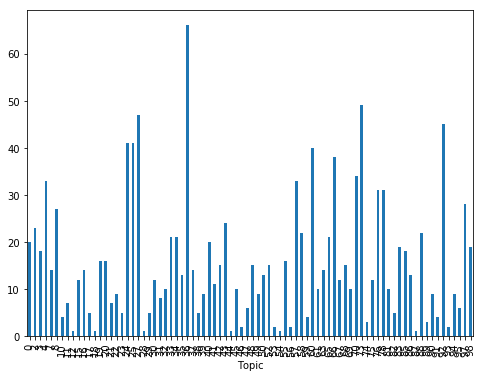

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
claim2topic20.groupby('Topic').Claim.count().plot.bar(ylim=0)
plt.show()

In [36]:
claim2topic20[claim2topic20.Topic==98]

,Claim,Topic,TopicKeyWords
107,Photo of a mannequin being wheeled into a hosp...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
199,A claim on Facebook that began to circulate ar...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
258,Photo of coffins of coronavirus patients who d...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
272,Photo on biography of a boy who died from coro...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
315,A photo of COVID patients lying on beds in ...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
322,Photo shows food being distributed to Rwandans...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
393,Last photo of Indonesian doctor Hadio Ali stan...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
409,Congress included include a raise for themselv...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
441,A post says that on people died ...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."
708,Photos show animals returning to clear Venice ...,98,"0.731*""photo"" + 0.183*""includ"" + 0.021*""lockdo..."


In [92]:
claim2topic10 = train_model_claim(clean_content, num_topics=10)

In [93]:
claim2topic10[claim2topic10.Topic==0]

,Claim,Topic,TopicKeyWords
1,Covid was reported on,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
2,Symptom of Covid is fever,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
3,Symptom of Covid is a dry cough,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
4,Symptom of Covid is fatigue,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
5,Less common symptom of Covid is loss of taste,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
6,Less common symptom of Covid is loss of smell,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
7,Less common symptom of Covid is nasal congestion,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
8,Less common symptom of Covid is conjunctivitis...,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
9,Less common symptom of Covid is sore throat,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
10,Less common symptom of Covid is headache,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
